# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import the Dataset

In [3]:


dataset = pd.read_csv("data_after_mice.csv",header=0,encoding='utf-8')

df = dataset.copy()

In [4]:
df.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,...,verification_status_Source Verified,verification_status_Verified,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),issue_month,issue_year
0,0,7000.0,7000.0,7000.0,0,6.62,214.93,0,48000.0,16.00,...,1,0,0,0,1,0,0,0,10,2011
1,1,7200.0,7200.0,7200.0,0,12.42,240.59,9,35000.0,6.14,...,0,0,0,0,1,0,0,0,10,2011
2,2,22000.0,22000.0,22000.0,0,14.65,758.88,1,192000.0,1.82,...,0,1,0,0,1,0,0,0,10,2011
3,3,18750.0,18750.0,18750.0,0,7.90,586.70,3,75000.0,13.94,...,1,0,0,0,1,0,0,0,11,2011
4,4,12500.0,12500.0,12500.0,0,7.90,391.13,3,32500.0,24.15,...,0,0,0,0,1,0,0,0,10,2011


In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,verification_status_Source Verified,verification_status_Verified,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),issue_month,issue_year
0,7000.0,7000.0,7000.0,0,6.62,214.93,0,48000.0,16.00,0.0,...,1,0,0,0,1,0,0,0,10,2011
1,7200.0,7200.0,7200.0,0,12.42,240.59,9,35000.0,6.14,0.0,...,0,0,0,0,1,0,0,0,10,2011
2,22000.0,22000.0,22000.0,0,14.65,758.88,1,192000.0,1.82,0.0,...,0,1,0,0,1,0,0,0,10,2011
3,18750.0,18750.0,18750.0,0,7.90,586.70,3,75000.0,13.94,0.0,...,1,0,0,0,1,0,0,0,11,2011
4,12500.0,12500.0,12500.0,0,7.90,391.13,3,32500.0,24.15,0.0,...,0,0,0,0,1,0,0,0,10,2011


In [7]:
dependent = df['int_rate']
df.drop(['int_rate'],axis=1,inplace=True)
independent = df

In [8]:
dependent.head()

0     6.62
1    12.42
2    14.65
3     7.90
4     7.90
Name: int_rate, dtype: float64

In [9]:
independent.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,verification_status_Source Verified,verification_status_Verified,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),issue_month,issue_year
0,7000.0,7000.0,7000.0,0,214.93,0,48000.0,16.00,0.0,0.0,...,1,0,0,0,1,0,0,0,10,2011
1,7200.0,7200.0,7200.0,0,240.59,9,35000.0,6.14,0.0,0.0,...,0,0,0,0,1,0,0,0,10,2011
2,22000.0,22000.0,22000.0,0,758.88,1,192000.0,1.82,0.0,1.0,...,0,1,0,0,1,0,0,0,10,2011
3,18750.0,18750.0,18750.0,0,586.70,3,75000.0,13.94,0.0,1.0,...,1,0,0,0,1,0,0,0,11,2011
4,12500.0,12500.0,12500.0,0,391.13,3,32500.0,24.15,0.0,0.0,...,0,0,0,0,1,0,0,0,10,2011


In [10]:
train_x, test_x, train_y, test_y = train_test_split(independent,dependent, test_size=0.3, random_state=42) 


In [11]:
train_x.shape

(4200, 79)

# Setup Basic Models

In [12]:
lm_lasso = Lasso()
lm_ridge = Ridge()
lm_elastic = ElasticNet()

lm_lasso
lm_ridge
lm_elastic

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
lm_lasso.fit(train_x, train_y)
lm_ridge.fit(train_x, train_y)
lm_elastic.fit(train_x, train_y)

C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11151.521018104573, tolerance: 7.566467330247615
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12443.270284543773, tolerance: 7.566467330247615
  positive)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

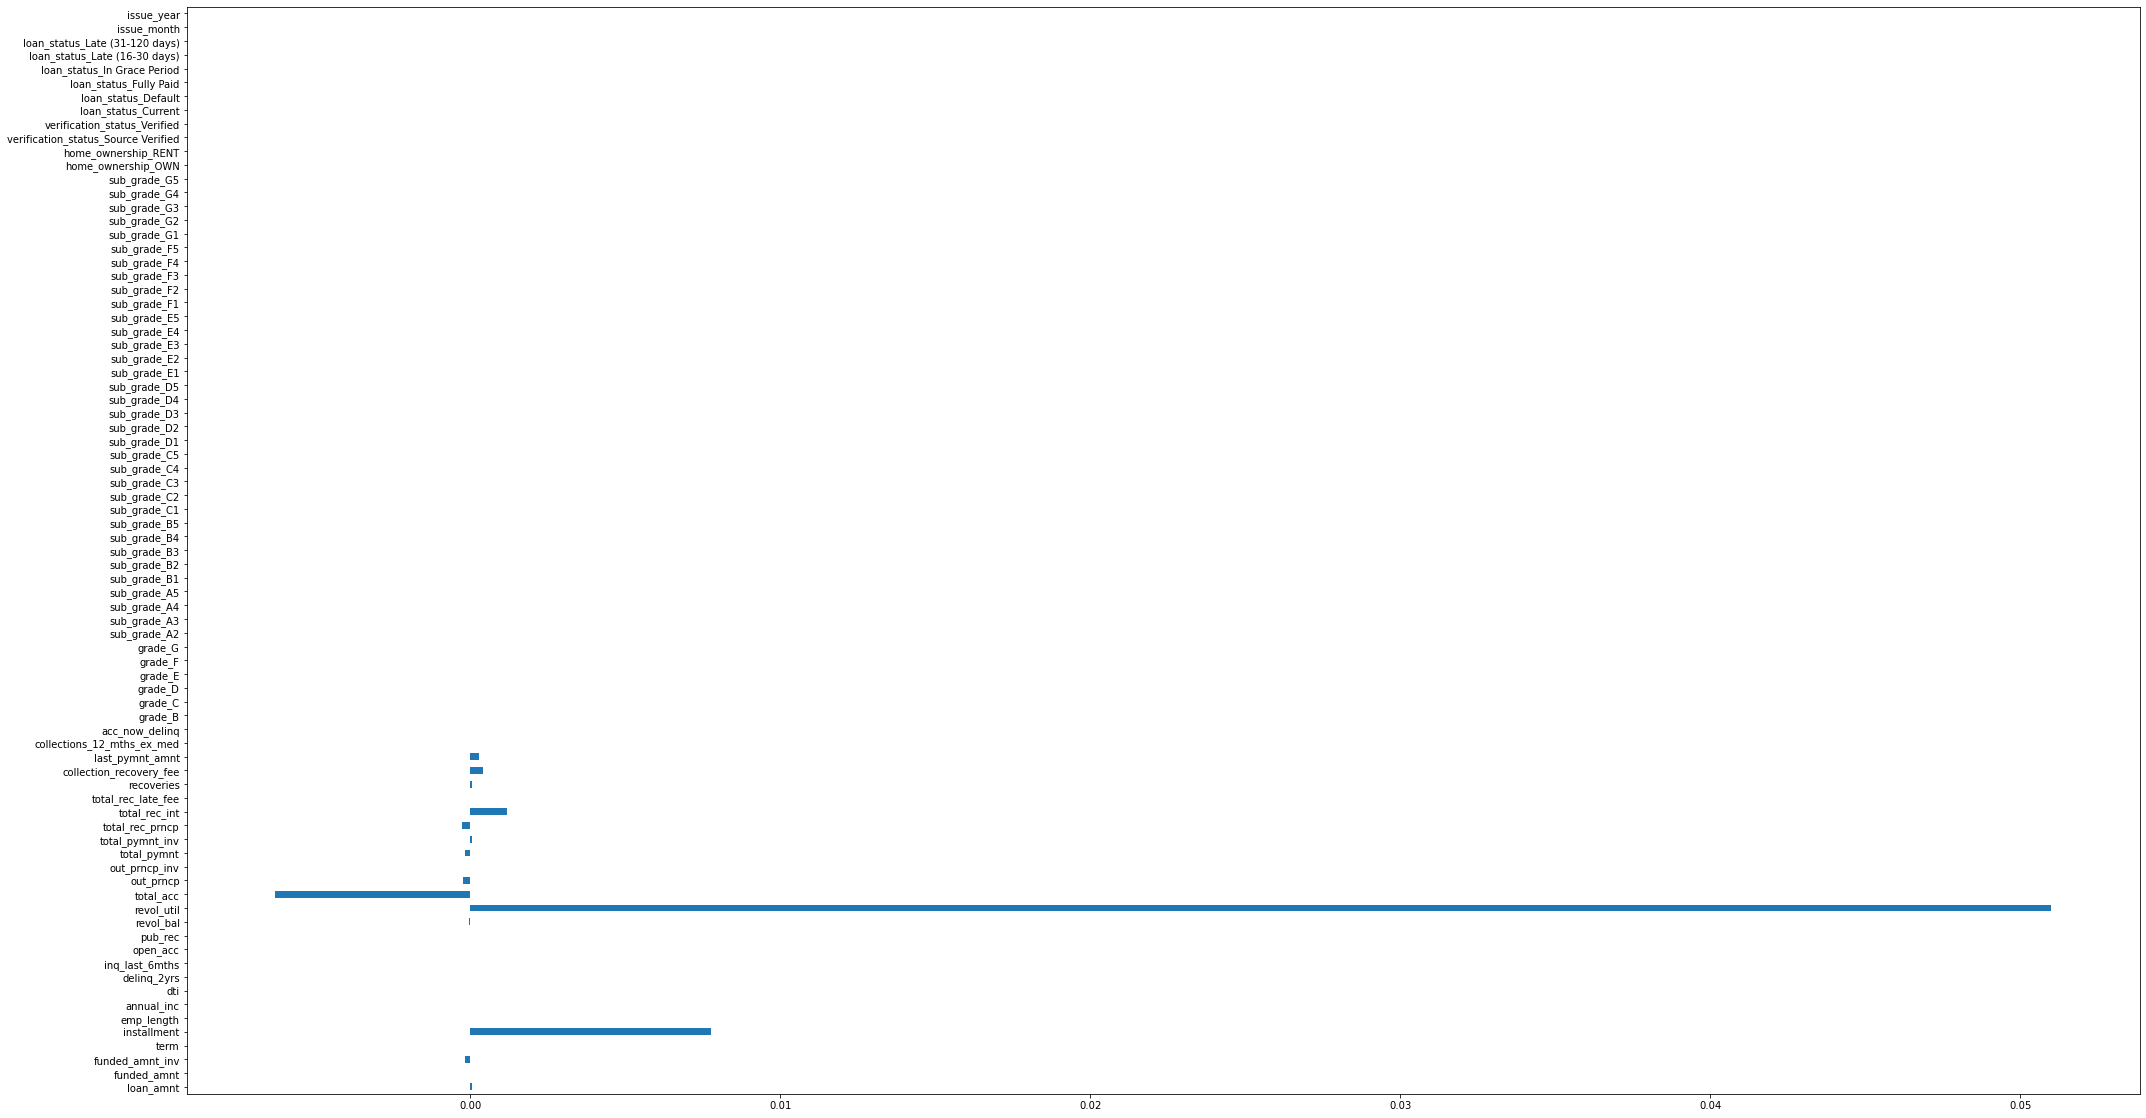

In [14]:
plt.figure(figsize=(35,20))
ft_importances_lm_lasso = pd.Series(lm_lasso.coef_, index = independent.columns)
ft_importances_lm_lasso.plot(kind='barh')
plt.show();

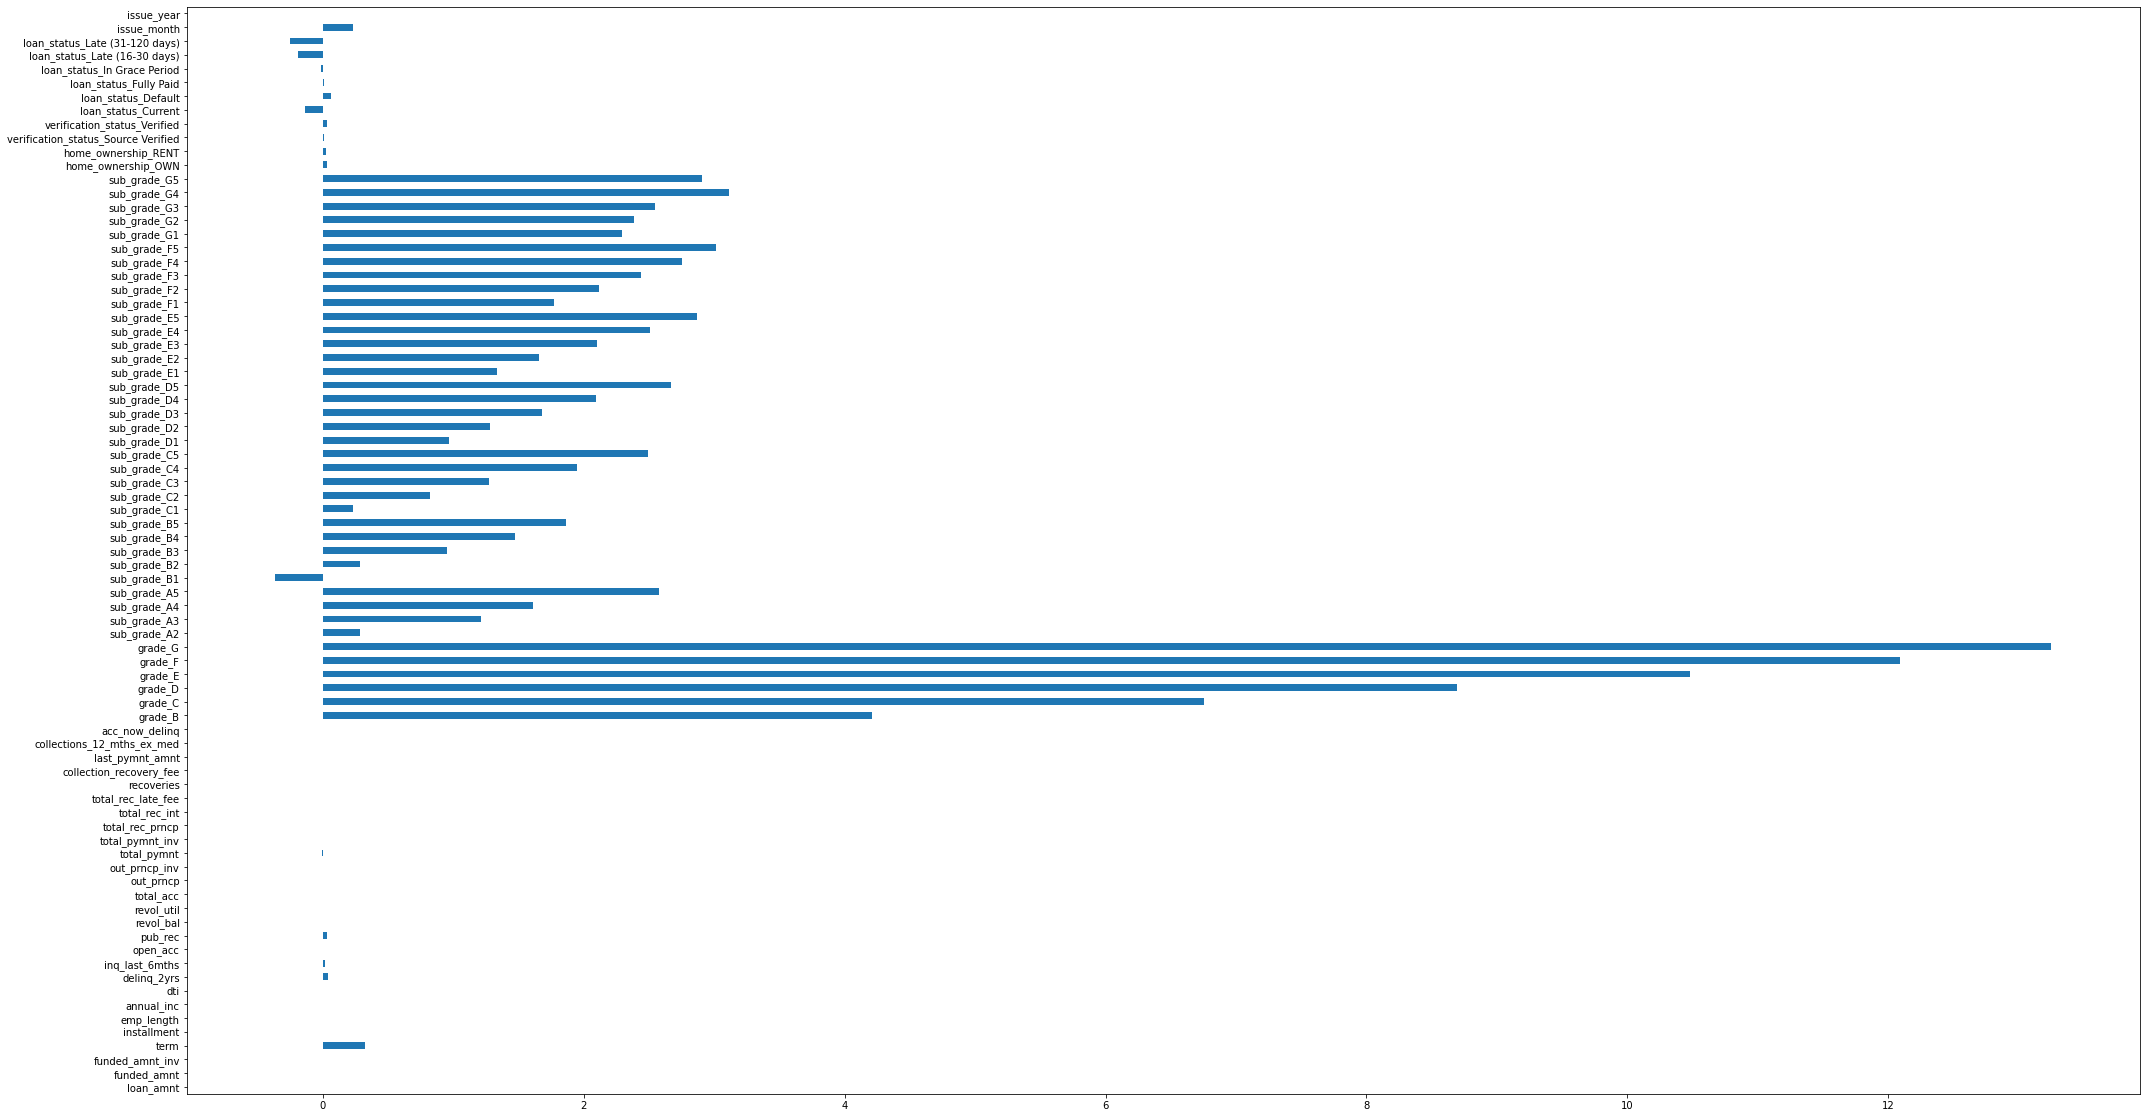

In [15]:
plt.figure(figsize=(35,20))
ft_importances_lm_ridge = pd.Series(lm_ridge.coef_, index = independent.columns)
ft_importances_lm_ridge.plot(kind='barh')
plt.show();

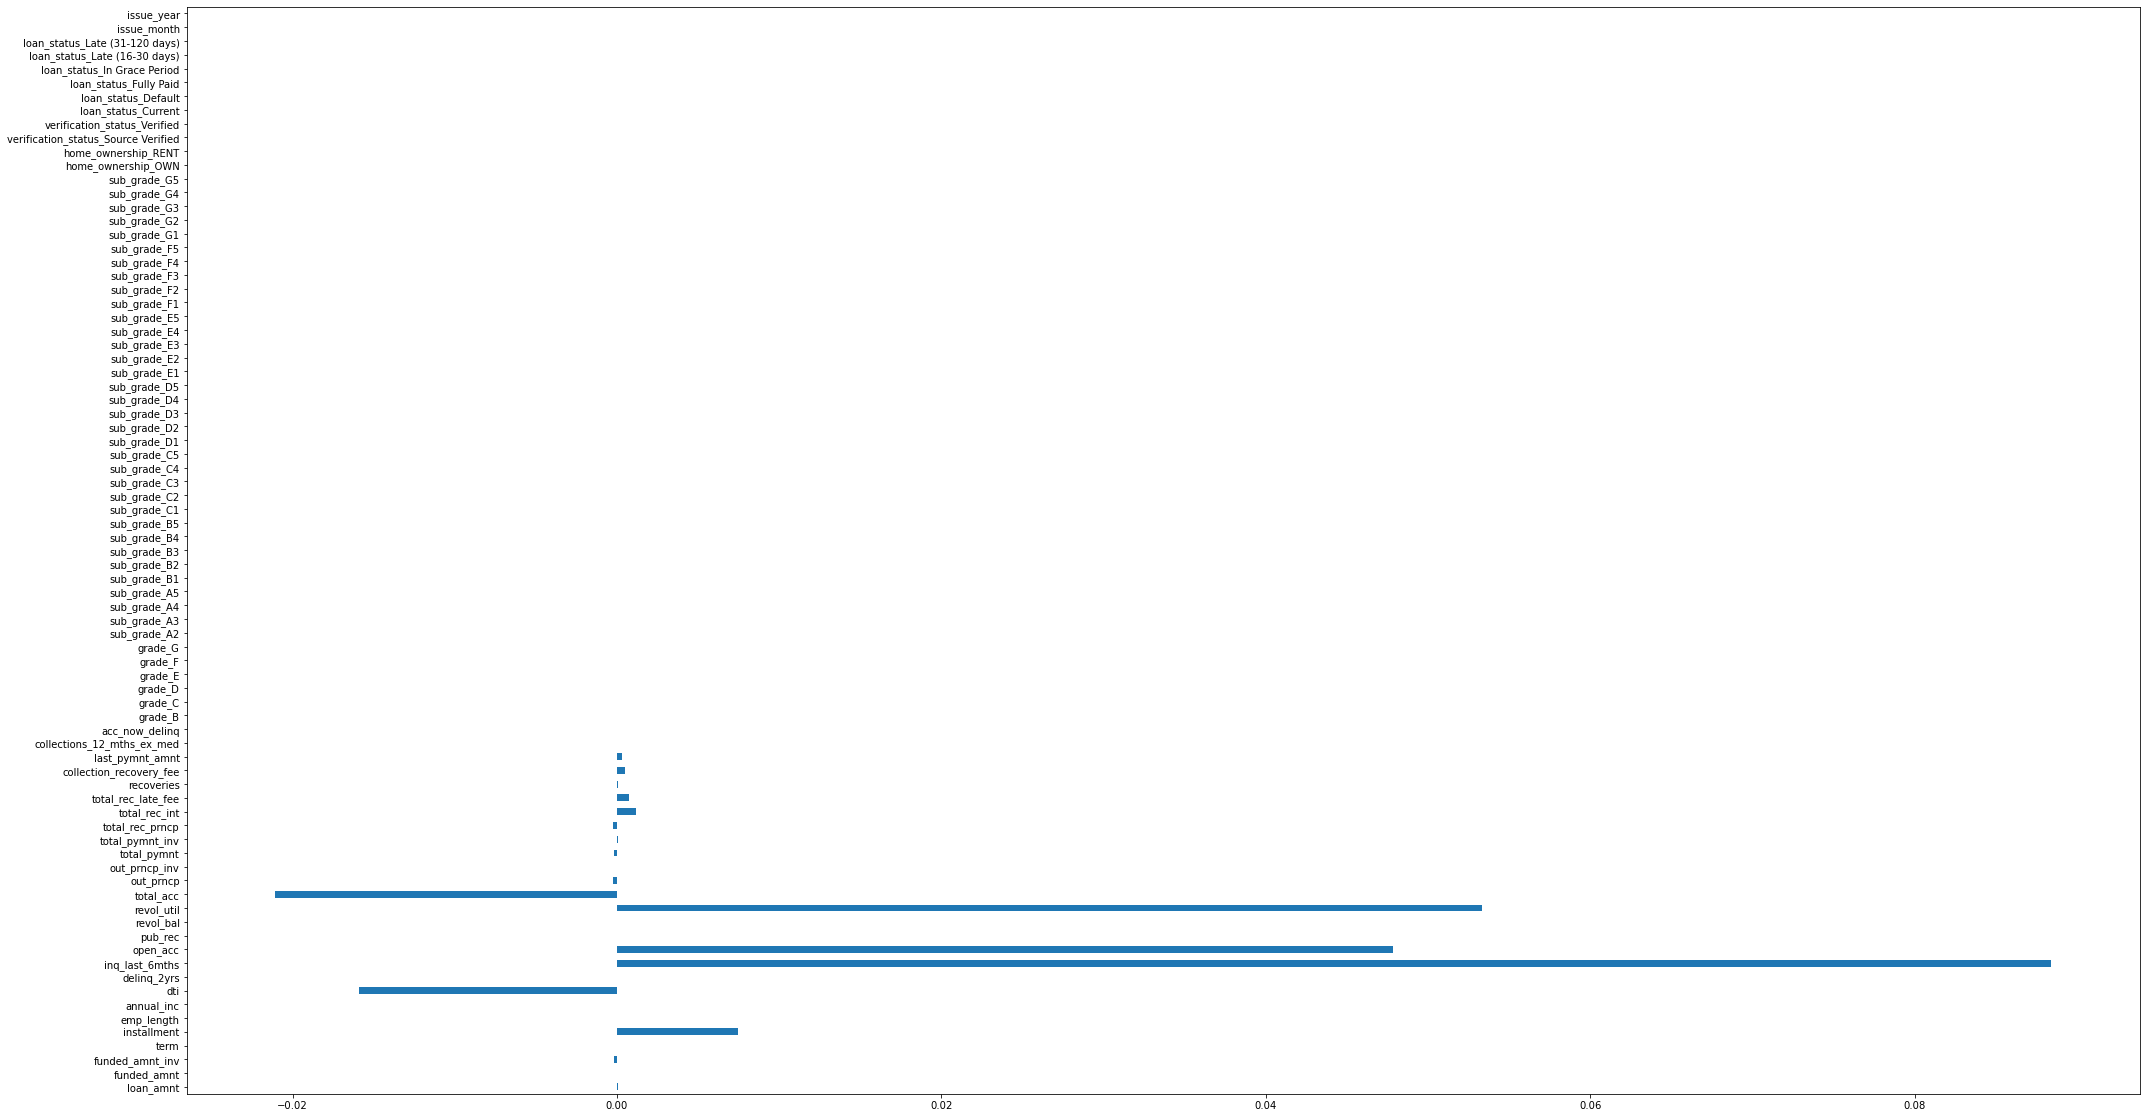

In [16]:
plt.figure(figsize=(35,20))
ft_importances_lm_elastic = pd.Series(lm_elastic.coef_, index = independent.columns)
ft_importances_lm_elastic.plot(kind='barh')
plt.show();

In [17]:
ft_importances_lm_elastic

loan_amnt                         0.000070
funded_amnt                      -0.000006
funded_amnt_inv                  -0.000161
term                              0.000000
installment                       0.007466
                                    ...   
loan_status_In Grace Period       0.000000
loan_status_Late (16-30 days)     0.000000
loan_status_Late (31-120 days)    0.000000
issue_month                      -0.000000
issue_year                        0.000000
Length: 79, dtype: float64

In [18]:
# R2 Value

print("RSquare Value for Lasso Regression Test Data is-")
np.round(lm_lasso.score(test_x,test_y)*100,2)

print("RSquare Value for Ridge Regression Test Data is-")
np.round(lm_ridge.score(test_x,test_y)*100,2)

print("RSquare Value for Elastic Net Regression Test Data is-")
np.round(lm_elastic.score(test_x,test_y)*100,2)

RSquare Value for Lasso Regression Test Data is-


59.34

RSquare Value for Ridge Regression Test Data is-


99.7

RSquare Value for Elastic Net Regression Test Data is-


60.49

#### Predict on Training and Test Data

In [19]:
predict_test_lasso = lm_lasso.predict(test_x)
predict_test_ridge = lm_ridge.predict(test_x)
predict_test_elastic = lm_elastic.predict(test_x)


In [20]:
mse_lasso = np.round(metrics.mean_squared_error(test_y, predict_test_lasso),2)
errors_test_lasso = abs(predict_test_lasso - test_y)
mape_test_lasso = 100 * np.mean(errors_test_lasso / test_y)
accuracy_test_lasso = 100 - mape_test_lasso

print("Lasso Regression Mean Squared ERROR (MSE) for Test Data is {}".format(mse_lasso))
print("Lasso MAPE for Test Data is {}%".format(mape_test_lasso))
print("Lasso Accuracy for Test Data is {}%".format(accuracy_test_lasso))

mse_ridge = np.round(metrics.mean_squared_error(test_y, predict_test_ridge),2)
errors_test_ridge = abs(predict_test_ridge - test_y)
mape_test_ridge = 100 * np.mean(errors_test_ridge / test_y)
accuracy_test_ridge = 100 - mape_test_ridge

print("Ridge Regression Mean Squared ERROR (MSE) for Test Data is {}".format(mse_ridge))
print("Ridge MAPE for Test Data is {}%".format(mape_test_ridge))
print("Ridge Accuracy for Test Data is {}%".format(accuracy_test_ridge))

mse_elastic = np.round(metrics.mean_squared_error(test_y, predict_test_elastic),2)
errors_test_elastic = abs(predict_test_elastic - test_y)
mape_test_elastic = 100 * np.mean(errors_test_elastic / test_y)
accuracy_test_elastic = 100 - mape_test_elastic

print("Elastic Regression Mean Squared ERROR (MSE) for Test Data is {}".format(mse_elastic))
print("Elastic MAPE for Test Data is {}%".format(mape_test_elastic))
print("Elastic Accuracy for Test Data is {}%".format(accuracy_test_elastic))

Lasso Regression Mean Squared ERROR (MSE) for Test Data is 7.48
Lasso MAPE for Test Data is 20.395938239861618%
Lasso Accuracy for Test Data is 79.60406176013838%
Ridge Regression Mean Squared ERROR (MSE) for Test Data is 0.05
Ridge MAPE for Test Data is 1.736626795397352%
Ridge Accuracy for Test Data is 98.26337320460264%
Elastic Regression Mean Squared ERROR (MSE) for Test Data is 7.26
Elastic MAPE for Test Data is 20.065105758108803%
Elastic Accuracy for Test Data is 79.9348942418912%


## Creating an Evaluation Function to Run Models

In [21]:
def evaluate(model,X_train,X_test,Y_train,Y_test):
    
    model.fit(X_train,Y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    
    errors_train = abs(predictions_train - Y_train)
    errors_test = abs(predictions_test - Y_test)
    
    mape_train = 100 * np.mean(errors_train / Y_train)
    mape_test = 100 * np.mean(errors_test / Y_test)
    
    accuracy_train = 100 - mape_train
    accuracy_test = 100 - mape_test
    print('Model Performance')
    print('Average Error(Train Data): {:0.4f} of int rate.'.format(np.mean(errors_train)))
    print('Average Error(Test Data): {:0.4f} of int rate.'.format(np.mean(errors_test)))
    
    print('Accuracy(Train Data) = {:0.2f}%.'.format(accuracy_train))
    print('Accuracy(Test Data) = {:0.2f}%.'.format(accuracy_test))
    
    print('Mape(Train Data): {:0.4f} of int rate'.format(mape_train))
    print('Mape(Test Data): {:0.4f} of int rate'.format(mape_test))
 
    return accuracy_train,accuracy_test

## Grid Search For Hyperparameter Tuning for all Models

In [22]:
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

In [23]:
# Tuning the Hyperparameter Alpha of Lasso Regression

model = Lasso()
grid_lasso = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid_lasso.fit(train_x,train_y)
print(grid_lasso)

# summarize the results of the grid search
print(grid_lasso.best_score_)
print(grid_lasso.best_estimator_)

C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8996.0178484751, tolerance: 6.089014348497025
  positive)
C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8639.825409569163, tolerance: 6.0360927413214265
  positive)
C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8790.960072482718, tolerance: 6.036403758809521
  positive)
C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obj

C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.45644968119225, tolerance: 6.0360927413214265
  positive)
C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.9975143030422691
Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [24]:
# Tuning the Hyperparameter Alpha of Elastic Regression

model = ElasticNet()
grid_elastic = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid_elastic.fit(train_x,train_y)
print(grid_elastic)

# summarize the results of the grid search
print(grid_elastic.best_score_)
print(grid_elastic.best_estimator_)

C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9830.184772371771, tolerance: 6.089014348497025
  positive)
C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10209.270280799446, tolerance: 6.0360927413214265
  positive)
C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9543.44567945888, tolerance: 6.036403758809521
  positive)
C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: O

C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.92311551973654, tolerance: 6.036403758809521
  positive)
C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the L

GridSearchCV(cv=None, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

GridSearchCV(cv=None, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.9975143030422691
ElasticNet(alpha=0.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


## Running the Models With the Best Hyperparmeters

In [25]:
lm_lasso_best = Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
                      normalize=False, positive=False, precompute=False, random_state=None,
                      selection='cyclic', tol=0.0001, warm_start=False)

evaluate(lm_lasso_best, train_x, test_x, train_y, test_y)


C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


Model Performance
Average Error(Train Data): 0.1676 of int rate.
Average Error(Test Data): 0.1678 of int rate.
Accuracy(Train Data) = 98.46%.
Accuracy(Test Data) = 98.46%.
Mape(Train Data): 1.5382 of int rate
Mape(Test Data): 1.5381 of int rate


C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90.68719508834107, tolerance: 7.566467330247615
  positive)


(98.46183761250946, 98.46192949784387)

In [26]:
lm_ridge_best = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
                      normalize=False, random_state=None, solver='auto', tol=0.001)

evaluate(lm_ridge_best,train_x, test_x, train_y, test_y)

Model Performance
Average Error(Train Data): 0.1871 of int rate.
Average Error(Test Data): 0.1864 of int rate.
Accuracy(Train Data) = 98.26%.
Accuracy(Test Data) = 98.26%.
Mape(Train Data): 1.7376 of int rate
Mape(Test Data): 1.7366 of int rate


(98.26244469687713, 98.26337320460264)

In [27]:
lm_elastic_best = ElasticNet(alpha=0.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
                              max_iter=1000, normalize=False, positive=False, precompute=False,
                              random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

evaluate(lm_elastic_best,train_x, test_x, train_y, test_y)

C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


Model Performance
Average Error(Train Data): 0.1676 of int rate.
Average Error(Test Data): 0.1678 of int rate.
Accuracy(Train Data) = 98.46%.
Accuracy(Test Data) = 98.46%.
Mape(Train Data): 1.5382 of int rate
Mape(Test Data): 1.5381 of int rate


C:\Users\Siddhi\Anaconda3\envs\Non-Tensor_Flow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90.68719508834107, tolerance: 7.566467330247615
  positive)


(98.46183761250946, 98.46192949784387)

We Chose the Hyperparameter "Alpha" to Tune

By Applying Hyperparameter Tuning on the Alpha Values of all the three algorithms, we can se that the Model Performance Improved Significantly.